In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
import seaborn as sns
from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [44]:
df = pd.read_csv("/content/titanic_dataset - Final_Final.csv")
target_column = "Survived"

X = df.drop(target_column, axis=1).values  # Features
y = df[target_column].values    #target

#331 training examples after cleansing
print(df)

     Survived  Pclass  Age  Sibsp     Fare
0           0       3   35      0    7.829
1           1       3   47      1    7.000
2           0       2   62      0    9.688
3           0       3   27      0    8.663
4           1       3   22      1   12.288
..        ...     ...  ...    ...      ...
326         1       3    3      1   13.775
327         1       1   37      1   90.000
328         1       3   28      0    7.775
329         1       1   39      0  108.900
330         0       3   39      0    7.250

[331 rows x 5 columns]


In [46]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#split data into training and testing
#using a 75% training to 25% testing set split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

from imblearn.over_sampling import SMOTE

# Address Training Imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print(X_train.shape)


(294, 4)


In [47]:
#Scale the dataset (Normalization)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [79]:
#Testing Various Kernels & Regularizations
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


#Testing Linear Kernel SVM (A) with L1 regularization
lambda_vals = [0.1, 0.5, 1, 2, 5, 10, 20]

C_vals = []
for i in lambda_vals:
  i = lambda_vals[0]
  svm_A0 = LinearSVC(penalty='l1' , dual=False, C=i )
  svm_A0.fit(X_train, y_train)
  y_predA0 = svm_A0.predict(X_test)

  acc_A0_ts = accuracy_score(y_test,y_predA0)
  C_vals.append(acc_A0_ts)
  print("Accuracy of test set (C="+str(i)+"):", acc_A0_ts)

  print("Classification Report for testing:")
  print(classification_report(y_test, y_predA0))

  y_predA0_tr = svm_A0.predict(X_train)
  acc_A0_tr = accuracy_score(y_train,y_predA0_tr)
  print("Accuracy of training set (C="+str(i)+"):", acc_A0_tr)

  print("Classification Report for training:")
  print(classification_report(y_train, y_predA0_tr))


Accuracy of test set (C=0.1): 0.6867469879518072
Classification Report for testing:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        57
           1       0.50      0.46      0.48        26

    accuracy                           0.69        83
   macro avg       0.63      0.63      0.63        83
weighted avg       0.68      0.69      0.68        83

Accuracy of training set (C=0.1): 0.5544217687074829
Classification Report for training:
              precision    recall  f1-score   support

           0       0.54      0.78      0.64       147
           1       0.60      0.33      0.43       147

    accuracy                           0.55       294
   macro avg       0.57      0.55      0.53       294
weighted avg       0.57      0.55      0.53       294

Accuracy of test set (C=0.1): 0.6867469879518072
Classification Report for testing:
              precision    recall  f1-score   support

           0       0.76      0.79 

<Figure size 640x480 with 0 Axes>

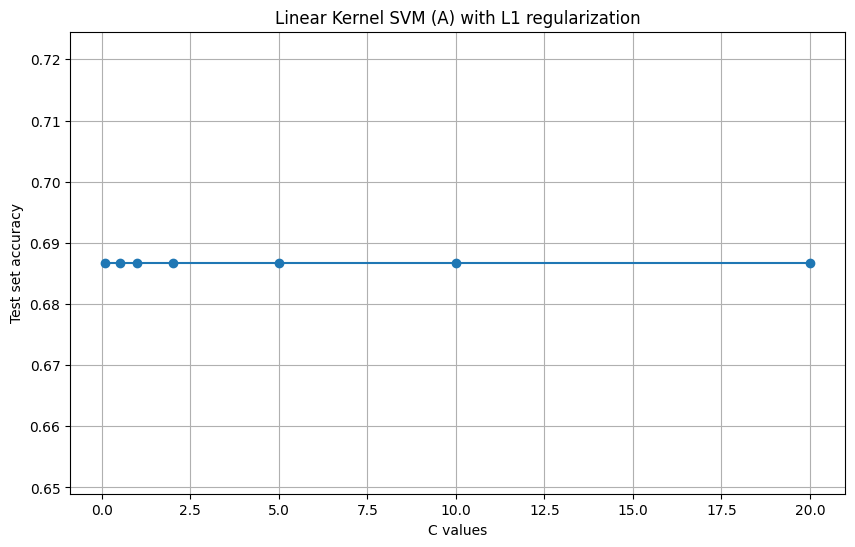

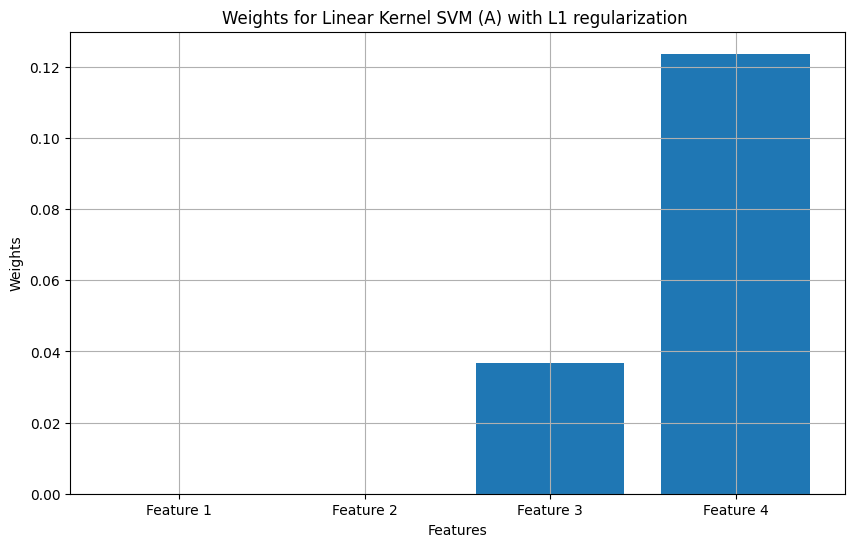

In [81]:
#Graphs - Illustrating Feature Weights & Error

x = lambda_vals
y = C_vals

plt.clf()
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('C values')
plt.ylabel('Test set accuracy')
plt.title('Linear Kernel SVM (A) with L1 regularization')
plt.grid(True)
plt.show()


weights = svm_A0.coef_[0]

# Plot the weights
plt.figure(figsize=(10, 6))
plt.bar(range(len(weights)), weights)
plt.xticks(range(len(weights)), ['Feature 1', 'Feature 2','Feature 3', 'Feature 4'])
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Weights for Linear Kernel SVM (A) with L1 regularization ')
plt.grid(True)
plt.show()


In [87]:
#Testing Linear Kernel SVM (A) with L2 regularization
lambda_vals = [0.1, 0.5, 1, 2, 5, 10, 20]
C_values = []
for i in lambda_vals:
  svm_A0 = LinearSVC(penalty='l2' , dual=False, C=lambda_vals[0])
  svm_A0.fit(X_train, y_train)
  y_predA0 = svm_A0.predict(X_test)


  acc_A0_ts = accuracy_score(y_test,y_predA0)
  C_values.append(acc_A0_ts)
  print("Accuracy of test set (C="+str(i)+"):", acc_A0_ts)

  print("Confusion Matrix for test set:")
  print(confusion_matrix(y_test, y_predA0))

  print("Classification Report for testing:")
  print(classification_report(y_test, y_predA0))

  y_predA0_tr = svm_A0.predict(X_train)
  acc_A0_tr = accuracy_score(y_train,y_predA0_tr)
  print("Accuracy of training set (C="+str(i)+"):", acc_A0_tr)

  print("Confusion Matrix for train set:")
  print(confusion_matrix(y_train, y_predA0_tr))

  print("Classification Report for training:")
  print(classification_report(y_train, y_predA0_tr))

Accuracy of test set (C=0.1): 0.6746987951807228
Confusion Matrix for test set:
[[44 13]
 [14 12]]
Classification Report for testing:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77        57
           1       0.48      0.46      0.47        26

    accuracy                           0.67        83
   macro avg       0.62      0.62      0.62        83
weighted avg       0.67      0.67      0.67        83

Accuracy of training set (C=0.1): 0.5544217687074829
Confusion Matrix for train set:
[[113  34]
 [ 97  50]]
Classification Report for training:
              precision    recall  f1-score   support

           0       0.54      0.77      0.63       147
           1       0.60      0.34      0.43       147

    accuracy                           0.55       294
   macro avg       0.57      0.55      0.53       294
weighted avg       0.57      0.55      0.53       294

Accuracy of test set (C=0.5): 0.6746987951807228
Confusion Matrix fo

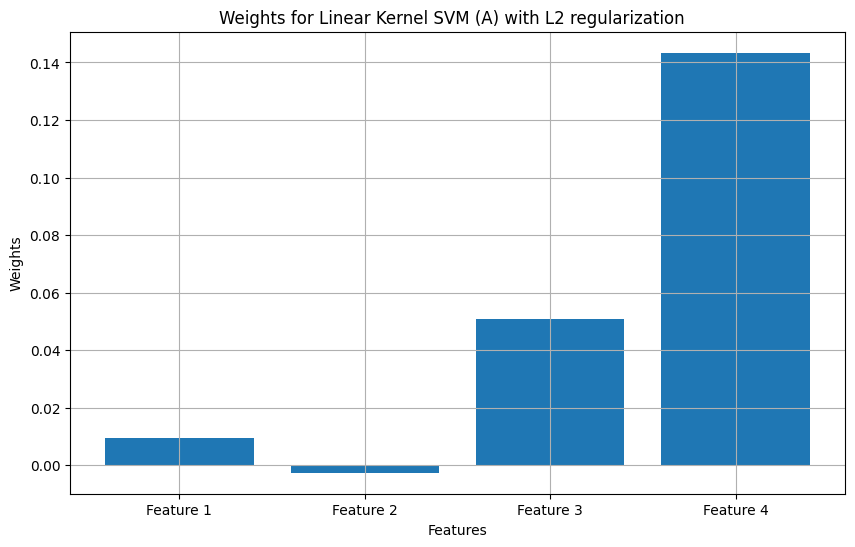

In [84]:
#Graphs - Illustrating Feature Weights & Error

weights = svm_A0.coef_[0]

# Plot the weights
plt.figure(figsize=(10, 6))
plt.bar(range(len(weights)), weights)
plt.xticks(range(len(weights)), ['Feature 1', 'Feature 2','Feature 3', 'Feature 4'])
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Weights for Linear Kernel SVM (A) with L2 regularization  ')
plt.grid(True)
plt.show()

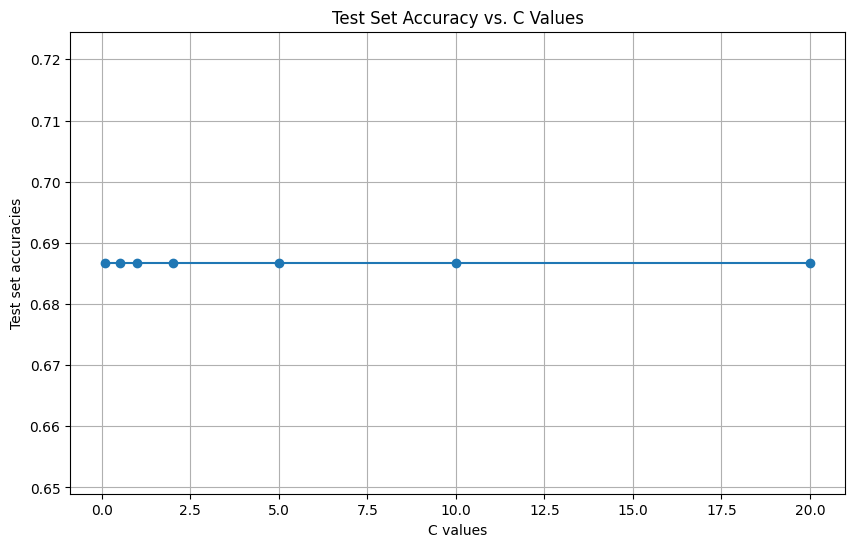

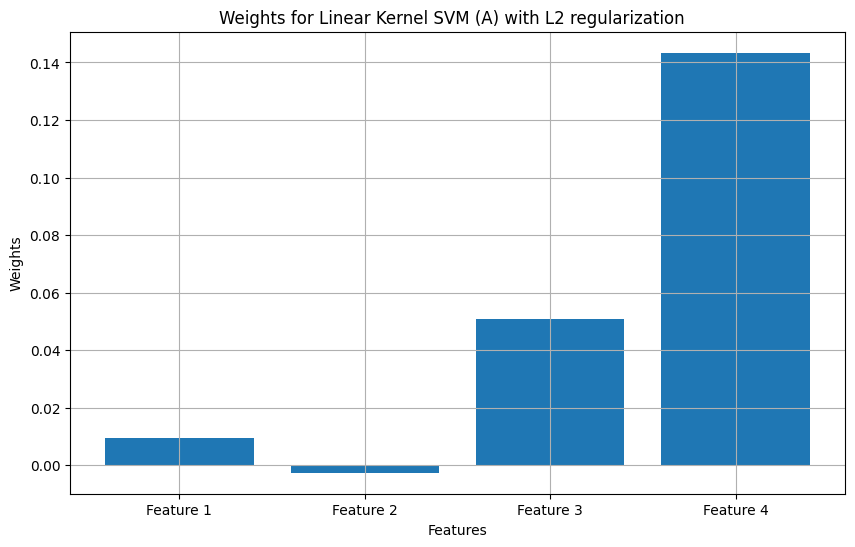

In [88]:
x = lambda_vals
y = C_vals

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('C values')
plt.ylabel('Test set accuracies')
plt.title('Test Set Accuracy vs. C Values')
plt.grid(True)
plt.show()


weights = svm_A0.coef_[0]

# Plot the weights
plt.figure(figsize=(10, 6))
plt.bar(range(len(weights)), weights)
plt.xticks(range(len(weights)), ['Feature 1', 'Feature 2','Feature 3', 'Feature 4'])
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Weights for Linear Kernel SVM (A) with L2 regularization  ')
plt.grid(True)
plt.show()

In [89]:
#Testing Polynomial kernel (B) with C=1 regularization
degrees = [1,2,3,4,5]
degree_vals = []
for i in degrees:
  svm_B0 = SVC(kernel="poly", degree = 4, C=1.0 )
  svm_B0.fit(X_train, y_train)
  y_predB0 = svm_B0.predict(X_test)


  acc_B0_ts = accuracy_score(y_test,y_predB0)
  degree_vals.append(acc_B0_ts)
  print("Accuracy of test set (Degree="+str(i)+"):", acc_B0_ts)

  print("Confusion Matrix for test set:")
  print(confusion_matrix(y_test, y_predB0))

  print("Classification Report for testing:")
  print(classification_report(y_test, y_predB0))

  y_predB0_tr = svm_B0.predict(X_train)
  acc_B0_tr = accuracy_score(y_train,y_predB0_tr)
  print("Accuracy of training set (Degree="+str(i)+"):", acc_B0_tr)

  print("Confusion Matrix for training set:")
  print(confusion_matrix(y_train, y_predB0_tr))

  print("Classification Report for testing:")
  print(classification_report(y_train, y_predB0_tr))

Accuracy of test set (Degree=1): 0.7228915662650602
Confusion Matrix for test set:
[[53  4]
 [19  7]]
Classification Report for testing:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        57
           1       0.64      0.27      0.38        26

    accuracy                           0.72        83
   macro avg       0.69      0.60      0.60        83
weighted avg       0.70      0.72      0.68        83

Accuracy of training set (Degree=1): 0.5952380952380952
Confusion Matrix for training set:
[[145   2]
 [117  30]]
Classification Report for testing:
              precision    recall  f1-score   support

           0       0.55      0.99      0.71       147
           1       0.94      0.20      0.34       147

    accuracy                           0.60       294
   macro avg       0.75      0.60      0.52       294
weighted avg       0.75      0.60      0.52       294

Accuracy of test set (Degree=2): 0.7228915662650602
Confusio

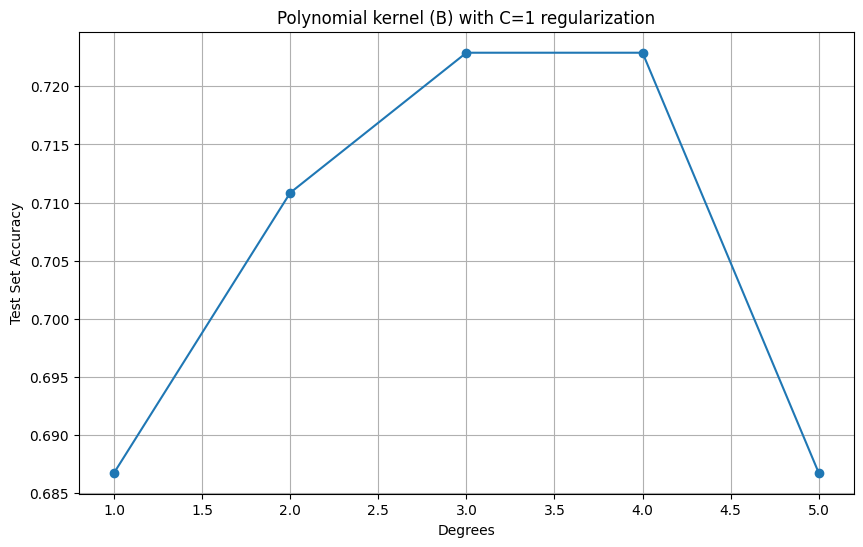

In [65]:
x = degrees
y = degree_vals

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Degrees')
plt.ylabel('Test Set Accuracy')
plt.title('Polynomial kernel (B) with C=1 regularization')
plt.grid(True)
plt.show()

In [70]:
#Testing RBF kernel (C) with C=1 regularization
gammas = [0.05,0.1,0.5,0.75,0.9]
gamma_vals = []
for i in gammas:
  svm_C0 = SVC(kernel="rbf", gamma=i, C=0.75)
  svm_C0.fit(X_train, y_train)
  y_predC0 = svm_C0.predict(X_test)

  acc_C0_ts = accuracy_score(y_test,y_predC0)
  gamma_vals.append(acc_C0_ts)

  print("Accuracy of test set (Gamma="+str(i)+"):", acc_C0_ts)

  print("Classification Report for testing:")
  print(classification_report(y_test, y_predC0))

  y_predC0_tr = svm_C0.predict(X_train)
  acc_C0_tr = accuracy_score(y_train,y_predC0_tr)
  print("Accuracy of training set (Gamma="+str(i)+"):", acc_C0_tr)

  print("Classification Report for training:")
  print(classification_report(y_train, y_predC0_tr))

Accuracy of test set (Gamma=0.05): 0.6626506024096386
Classification Report for testing:
              precision    recall  f1-score   support

           0       0.80      0.68      0.74        57
           1       0.47      0.62      0.53        26

    accuracy                           0.66        83
   macro avg       0.63      0.65      0.63        83
weighted avg       0.69      0.66      0.67        83

Accuracy of training set (Gamma=0.05): 0.5986394557823129
Classification Report for training:
              precision    recall  f1-score   support

           0       0.58      0.71      0.64       147
           1       0.63      0.49      0.55       147

    accuracy                           0.60       294
   macro avg       0.60      0.60      0.59       294
weighted avg       0.60      0.60      0.59       294

Accuracy of test set (Gamma=0.1): 0.6626506024096386
Classification Report for testing:
              precision    recall  f1-score   support

           0       0

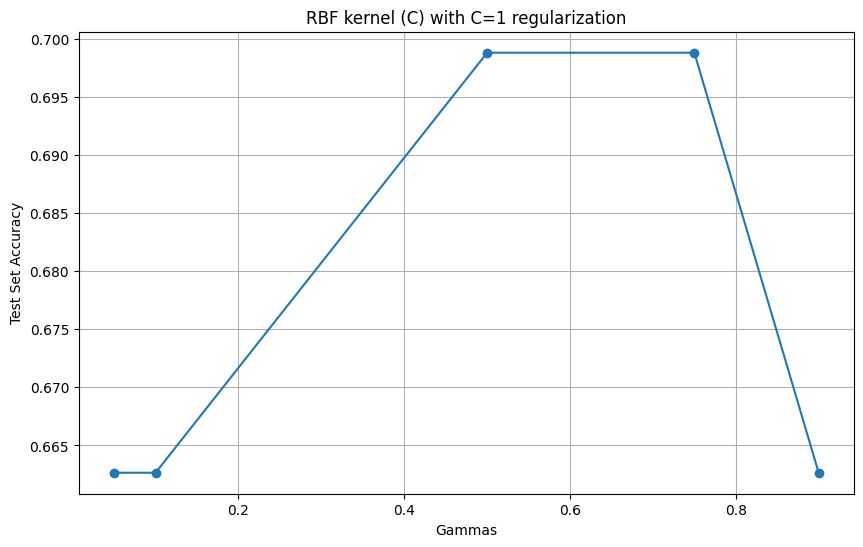

In [71]:
x = gammas
y = gamma_vals

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Gammas')
plt.ylabel('Test Set Accuracy')
plt.title('RBF kernel (C) with C=1 regularization')
plt.grid(True)
plt.show()